# Model SARIMA Implementation


In [9]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# Changing the path to the root of the repository

if not os.path.exists('data'):
    current_path = os.getcwd()
    root_path = os.path.abspath(os.path.join(current_path, '..'))
    os.chdir(root_path)
    print(f'Changed working directory to: {os.getcwd()}')

Changed working directory to: c:\Users\gusta\Desktop\CS\1A\energie climat\EI\EI_partieProjet\Forecast-of-Electricity-Consumption


In [20]:
df_group_4_daily = pd.read_parquet('data/02_processed/parquet/group_4_daily.parquet')
df_group_4_daily = df_group_4_daily.groupby(['Date','Acorn'])['Conso_kWh'].sum().to_frame()


df_group_4_daily.head(20)

Conso_kWh
Date       Acorn             
2012-07-01 ACORN-C  10.305622
           ACORN-F   8.158386
           ACORN-P   5.758356
2012-07-02 ACORN-C  10.222741
           ACORN-F   7.956669
           ACORN-P   5.707083
2012-07-03 ACORN-C  10.202942
           ACORN-F   7.807432
           ACORN-P   5.703083
2012-07-04 ACORN-C   9.481093
           ACORN-F   7.810004
           ACORN-P   5.728496
2012-07-05 ACORN-C   9.526791
           ACORN-F   7.614276
           ACORN-P   5.653287
2012-07-06 ACORN-C   9.484541
           ACORN-F   7.646658
           ACORN-P   5.656040
2012-07-07 ACORN-C  10.193990
           ACORN-F   7.824191

In [23]:
# Check stationarity of consumption series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_group_4_daily['Conso_kWh'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

from pandas import Series
df_group_4_diff = df_group_4_daily['Conso_kWh'].diff().dropna()

ADF Statistic: -1.5544762124157583
p-value: 0.5064115127994508


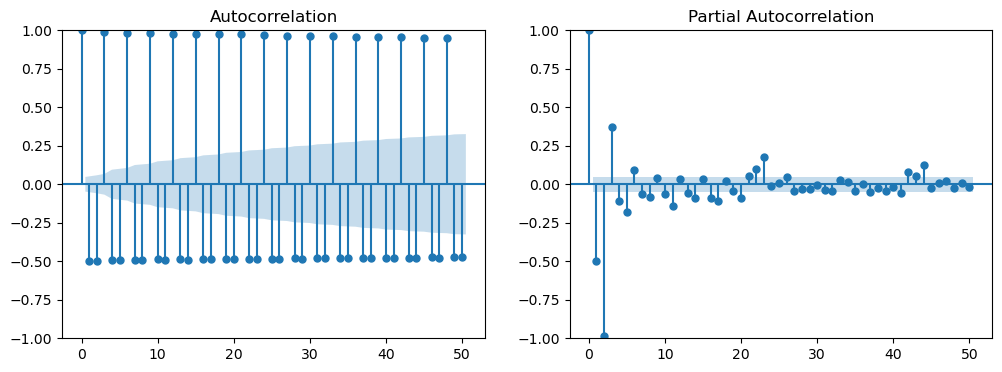

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_group_4_diff, ax=axes[0], lags=50)
plot_pacf(df_group_4_diff, ax=axes[1], lags=50)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Split without shuffling: keep chronological order
train_size = 0.8
df_train, df_test = train_test_split(
    df_group_4_daily,
    train_size=train_size,
    shuffle=False
)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example order and seasonal_order; adjust based on diagnostics
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 365)  # yearly seasonality

sarimax_model = SARIMAX(df_train['Conso_kWh'], order=order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit(disp=False)
print(sarimax_fit.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


KeyboardInterrupt: 